## Introduction:

- Write a function called Sample, that takes a Cdf and an integer, n, and returns a list of n values chosen at random from the Cdf. 

==> Hint: use random.random. You will find a solution to this exercise in Cdf.py


- Using the distribution of birth weights from the NSFG, generate a random sample with 1000 elements. Compute the CDF of the sample. Make a plot that shows the original CDF and the CDF of the random sample. For large values of n, the distributions should be the same.


## Solution steps:

- Choose a random probability in the range 0–1.
- Use Cdf.Value to find the value in the distribution that corresponds to the probability you chose.

In [42]:
import numpy as np
import random
import survey
import first
import Cdf
import relay
import score_example
import itertools
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

### Data Extraction:

In [4]:
table = survey.Pregnancies()
table.ReadRecords()
outcome_ = np.zeros([len(table.records), 1])

for i in xrange(len(table.records)):
    outcome_[i] = table.records[i].outcome

In [5]:
partitions = first.PartitionRecords(table)
partitions  # divide the data to firsts, others .. 

(<survey.Pregnancies at 0x7f009a927a50>,
 <survey.Pregnancies at 0x7f009a927210>)

In [6]:
first_baby = partitions[0]
others = partitions[1]
len(first_baby), len(others)

(4413, 4735)

In [7]:
## tables 
t = first.MakeTables()
original_table = t[0]
firsts_table = t[1]
others_table = t[2]

original_table, firsts_table, others_table

(<survey.Pregnancies at 0x7f009a927b50>,
 <survey.Pregnancies at 0x7f0099ffb1d0>)

In [8]:
## I have to try Dr's way as a more effecient way .. 


first_baby_ = np.zeros([len(firsts_table.records), 1])

for i in xrange(len(firsts_table.records)):
    try:
        first_baby_[i] = firsts_table.records[i].birthwgt_oz
    except ValueError:
        first_baby_[i] = 0

In [9]:
others_baby_ = np.zeros([len(others_table.records), 1])

for i in xrange(len(others_table.records)):
    try:
        others_baby_[i] = others_table.records[i].birthwgt_oz
    except ValueError:
        others_baby_[i] = 0

In [10]:
all_babies = np.append(first_baby_, others_baby_)
all_babies ## weights of all babies .. 

array([ 13.,   2.,   9., ...,   0.,   8.,   8.])

In [11]:
merged = list(itertools.chain(*[all_babies]))
len(merged)

9148

In [12]:
cdf_population = Cdf.MakeCdfFromList(merged)

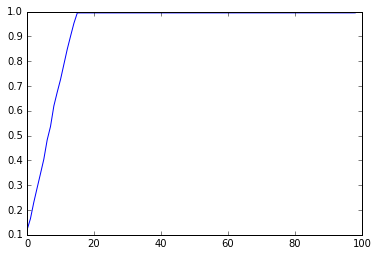

In [13]:
plt.plot(cdf_population.xs, cdf_population.ps)

The above plot demonestrates the shape of population CDF .. 

It makes sense as it inceases till reaching a steady state of one

In [41]:
## RANDOMLY select n element from the weight's list and calc their cdf, then plot it ..
n = 1000
# index, sample_cdf  = Sample(cdf_population, n)
selected_weights = random.sample(merged, n)

In [43]:
merged_ = list(itertools.chain(*[selected_weights]))
len(merged_)

1000

In [44]:
cdf_sample = Cdf.MakeCdfFromList(merged_)

I need to plot the sample cdf and compare it with the original data's cdf

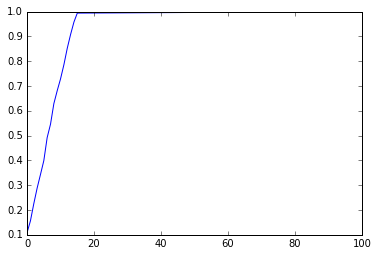

In [45]:
plt.plot(cdf_sample.xs, cdf_sample.ps)

almost the same shape ..